Plot images and labels from TFRecord file.

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from camvid_dataset import dataset, load_camvid_tfrecords
from camvid_utils import load_label_colors
from camvid_utils import show_image_row, color_label, unnormalize_image

In [3]:
label_colors_path = './camvid/label_colors.txt'
label_colors, _, _ = load_label_colors(label_colors_path)

In [4]:
camvid_path = './camvid-preprocessed/camvid-384x480-test.tfrecords'
with tf.Session() as sess:
    images, labels = load_camvid_tfrecords(sess, camvid_path, 5)
print('Images: %s, %s' % (images.shape, images.dtype))
print('Labels: %s, %s' % (labels.shape, labels.dtype))

Images: (5, 384, 480, 3), float32
Labels: (5, 184320), int32


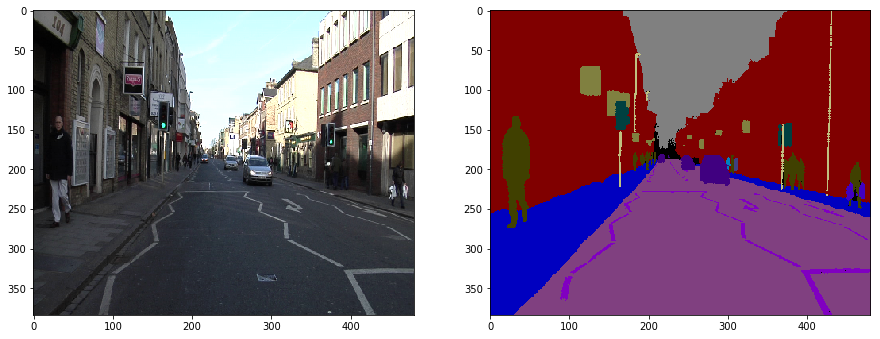

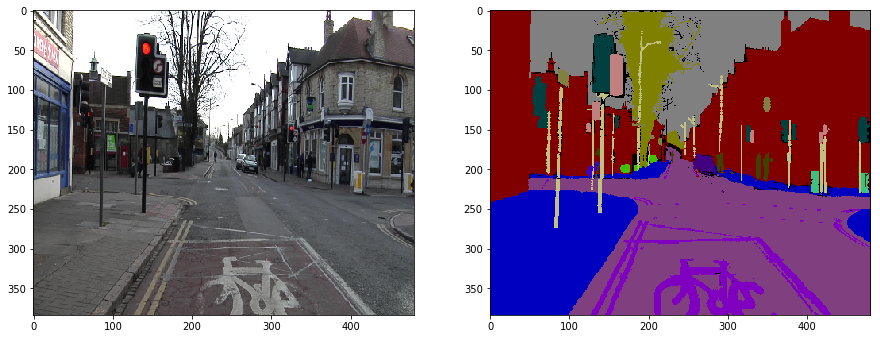

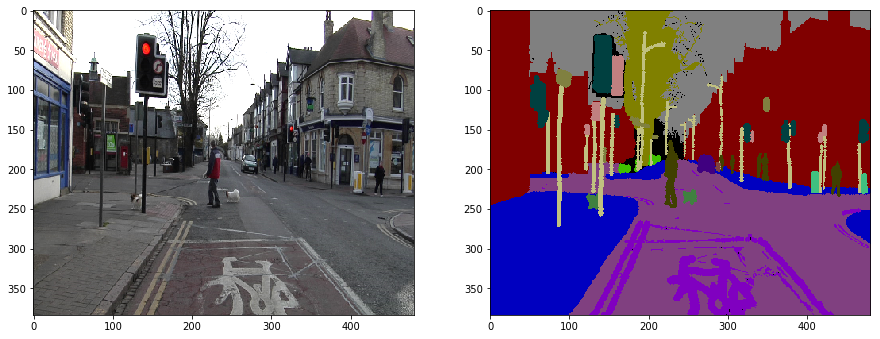

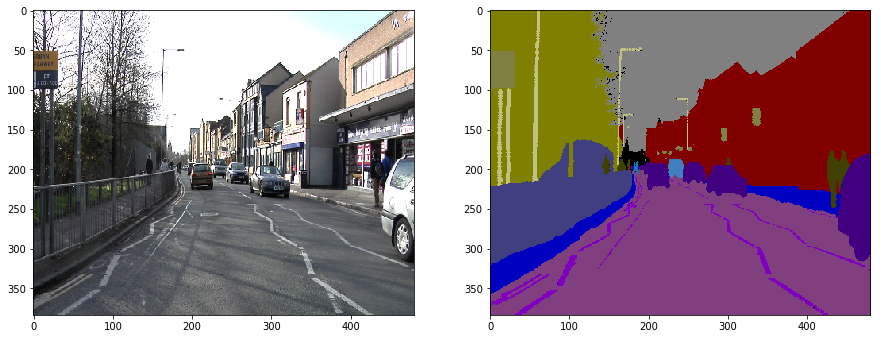

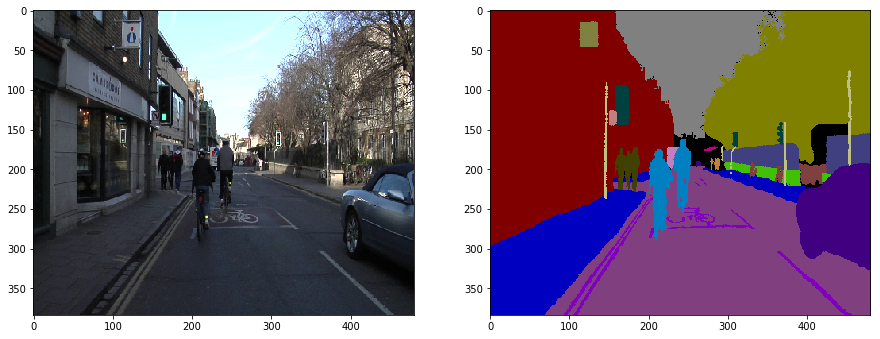

In [5]:
for i in range(len(images)):
    image = unnormalize_image(images[i])    
    label = labels[i].reshape((image.shape[0],image.shape[1]))
    label = color_label(label, label_colors)
    show_image_row([image, label])
    plt.show()